# SMOKE DETECTION

## Smoke Detection Dataset
A smoke detector is basically a device which detects smoke and raises an alarm to alert others. They are mostly used in offices, home, factories, etc. There are two types of smoke detectors:

- Photoelectric Smoke Detector - This type of detector contains a source of infrared, ultraviolet, visible light and a sensor. It detects the light intensity and generates an alarm if found below the threshold value, Since if smoke is present the light intensity decreases due to the presence of dust particles, smoke, etc.

- Ionization Smoke Detector - This type of detector contains an electronic circuit which measures the current difference and raises an alarm if found above the threshold. Since, due to smoke and duct particles the ions will be unable to move freely, it will decrease the current in the circuit.

Our objective is to make an AI model using the given dataset which will accurately raise an alarm if smoke is detected.



## Feature Description

- UTC - The time when experiment was performed.
- Temperature - Temperature of Surroundings. Measured in Celsius
- Humidity - The air humidity during the experiment.
- TVOC - Total Volatile Organic Compounds. Measured in ppb (parts per billion)
- eCo2 - CO2 equivalent concentration. Measured in ppm (parts per million)
- Raw H2 - The amount of Raw Hydrogen present in the surroundings.
- Raw Ethanol - The amount of Raw Ethanol present in the surroundings.
- Pressure - Air pressure. Measured in hPa
- PM1.0 - Paticulate matter of diameter less than 1.0 micrometer .
- PM2.5 - Paticulate matter of diameter less than 2.5 micrometer.
- NC0.5 - Concentration of particulate matter of diameter less than 0.5 micrometers.
- NC1.0 - Concentration of particulate matter of diameter less than 1.0 micrometers.
- NC2.5 - Concentration of particulate matter of diameter less than 2.5 micrometers.
- CNT - Simple Count.
- Fire Alarm - (Reality) If fire was present then value is 1 else it is 0.


In [1]:
# import libraries to work with

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
##load dataset from csv using the read_csv() method of pandas

data =pd.read_csv('smoke_detection_iot.csv')

## Understanding the dataset


The data comprised of the following

In [3]:
#check the upper dataset

data.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [4]:
# check the tail of the dataset

data.tail()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
62625,62625,1655130047,18.438,15.79,625,400,13723,20569,936.670,0.63,0.65,4.32,0.673,0.015,5739,0
62626,62626,1655130048,18.653,15.87,612,400,13731,20588,936.678,0.61,0.63,4.18,0.652,0.015,5740,0
62627,62627,1655130049,18.867,15.84,627,400,13725,20582,936.687,0.57,0.60,3.95,0.617,0.014,5741,0
62628,62628,1655130050,19.083,16.04,638,400,13712,20566,936.680,0.57,0.59,3.92,0.611,0.014,5742,0
62629,62629,1655130051,19.299,16.52,643,400,13696,20543,936.676,0.57,0.59,3.90,0.607,0.014,5743,0


In [5]:
#shape of the dataset

data.shape

(62630, 16)

In [6]:
# get the info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [7]:
#the description of the dataset

data.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [68]:
data.rename(columns ={'Temperature[C]':'Temp',
                      'Humidity[%]':'Humidity',
                      'TVOC[ppb]':'TVOC_ppb',
                      'eCO2[ppm]':'eCO2_ppm',
                      'Raw H2':'Raw_H2',
                     'Raw Ethanol':'Raw_Ethanol',
                     'Pressure[hPa]':'Pressure_hPa',
                      'PM1.0':'PM1', 'PM2.5':'PM2_5',
                      'NC0.5':'NC_5','NC1.0':'NC1', 'NC2.5':'NC2_5',
                     'Fire Alarm':'Fire_Alarm',
                     }, inplace=True)

In [9]:
data.columns

Index(['Unnamed: 0', 'UTC', 'Temp', 'Humidity', 'TVOC_ppb', 'eCO2_ppm',
       'Raw_H2', 'Raw_Ethanol', 'Pressure_hPa', 'PM1', 'PM2_5', 'NC_5', 'NC1',
       'NC2_5', 'CNT', 'Fire_Alarm'],
      dtype='object')

## DATA CLEANING¶

In [10]:
#check for missing data

data.isna().sum()

Unnamed: 0      0
UTC             0
Temp            0
Humidity        0
TVOC_ppb        0
eCO2_ppm        0
Raw_H2          0
Raw_Ethanol     0
Pressure_hPa    0
PM1             0
PM2_5           0
NC_5            0
NC1             0
NC2_5           0
CNT             0
Fire_Alarm      0
dtype: int64

In [63]:
# delete the unnamed column

data.drop(columns = ['Unnamed: 0', 'UTC', 'CNT'], axis =1, inplace =True)

data.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,0


## EXPLORATORY DATA ANALYSIS


Relationships and key features¶

In [64]:
# data correlation

data.corr()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
Temperature[C],1.000000,-0.243986,0.082442,0.079265,-0.135540,-0.037343,-0.251203,0.037330,0.032084,0.039291,0.031608,0.025526,-0.163902
Humidity[%],-0.243986,1.000000,-0.488878,-0.369095,0.247199,0.068782,0.694614,-0.236538,-0.178882,-0.277389,-0.174224,-0.118502,0.399846
TVOC[ppb],0.082442,-0.488878,1.000000,0.606118,-0.653053,-0.673715,-0.220004,0.597366,0.477424,0.670657,0.467386,0.344721,-0.214743
eCO2[ppm],0.079265,-0.369095,0.606118,1.000000,-0.682785,-0.506695,-0.326043,0.665482,0.572691,0.699604,0.564252,0.456323,-0.097006
Raw H2,-0.135540,0.247199,-0.653053,-0.682785,1.000000,0.631495,0.303090,-0.530714,-0.431079,-0.587769,-0.422626,-0.318518,0.107007
Raw Ethanol,-0.037343,0.068782,-0.673715,-0.506695,0.631495,1.000000,-0.075926,-0.480698,-0.393192,-0.529186,-0.385720,-0.293351,-0.340652
Pressure[hPa],-0.251203,0.694614,-0.220004,-0.326043,0.303090,-0.075926,1.000000,-0.258938,-0.243071,-0.248657,-0.241148,-0.213390,0.249797
PM1.0,0.037330,-0.236538,0.597366,0.665482,-0.530714,-0.480698,-0.258938,1.000000,0.956118,0.940045,0.949860,0.854901,-0.110552
PM2.5,0.032084,-0.178882,0.477424,0.572691,-0.431079,-0.393192,-0.243071,0.956118,1.000000,0.798873,0.999787,0.969382,-0.084916
NC0.5,0.039291,-0.277389,0.670657,0.699604,-0.587769,-0.529186,-0.248657,0.940045,0.798873,1.000000,0.786274,0.626711,-0.128118


<AxesSubplot:>

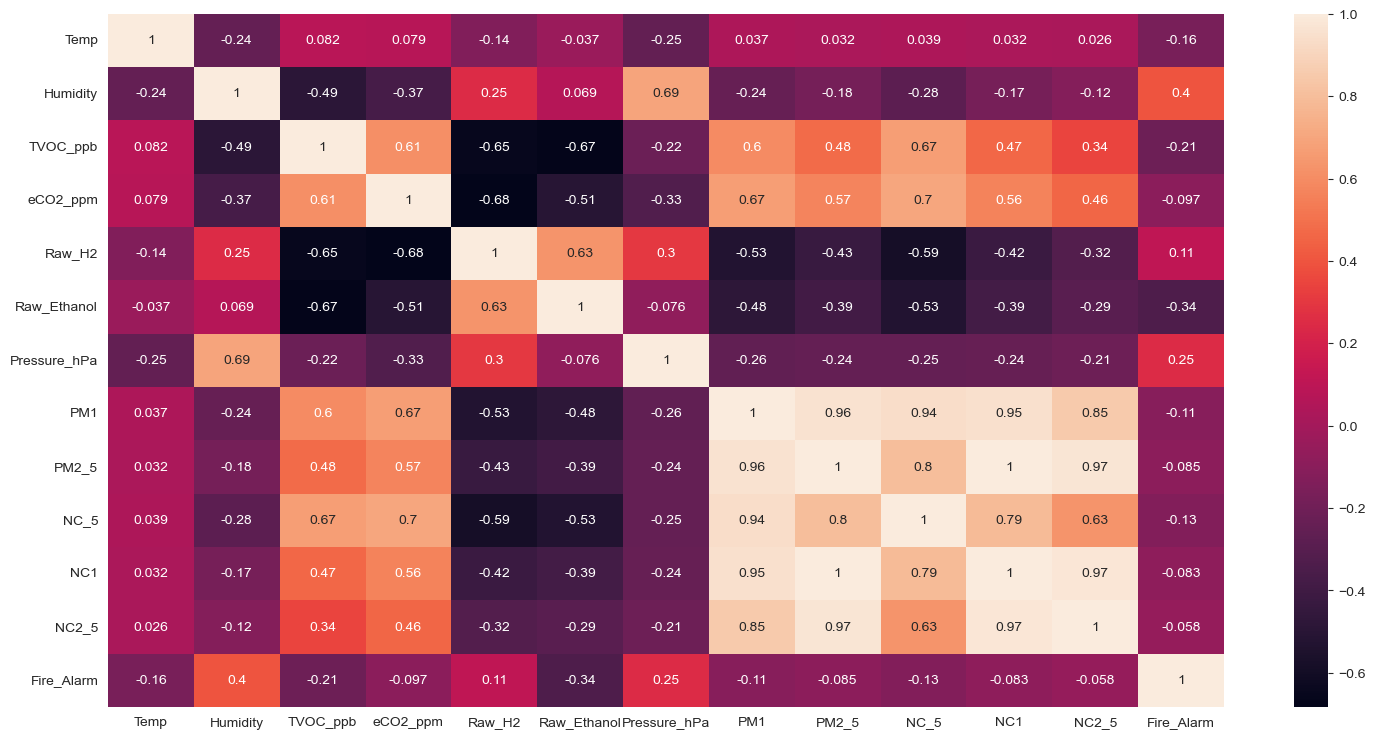

In [69]:
#correlation using heatmap

plt.figure(figsize=(18,9))

sns.heatmap(data.corr(),annot=True)

### Univariate Analysis

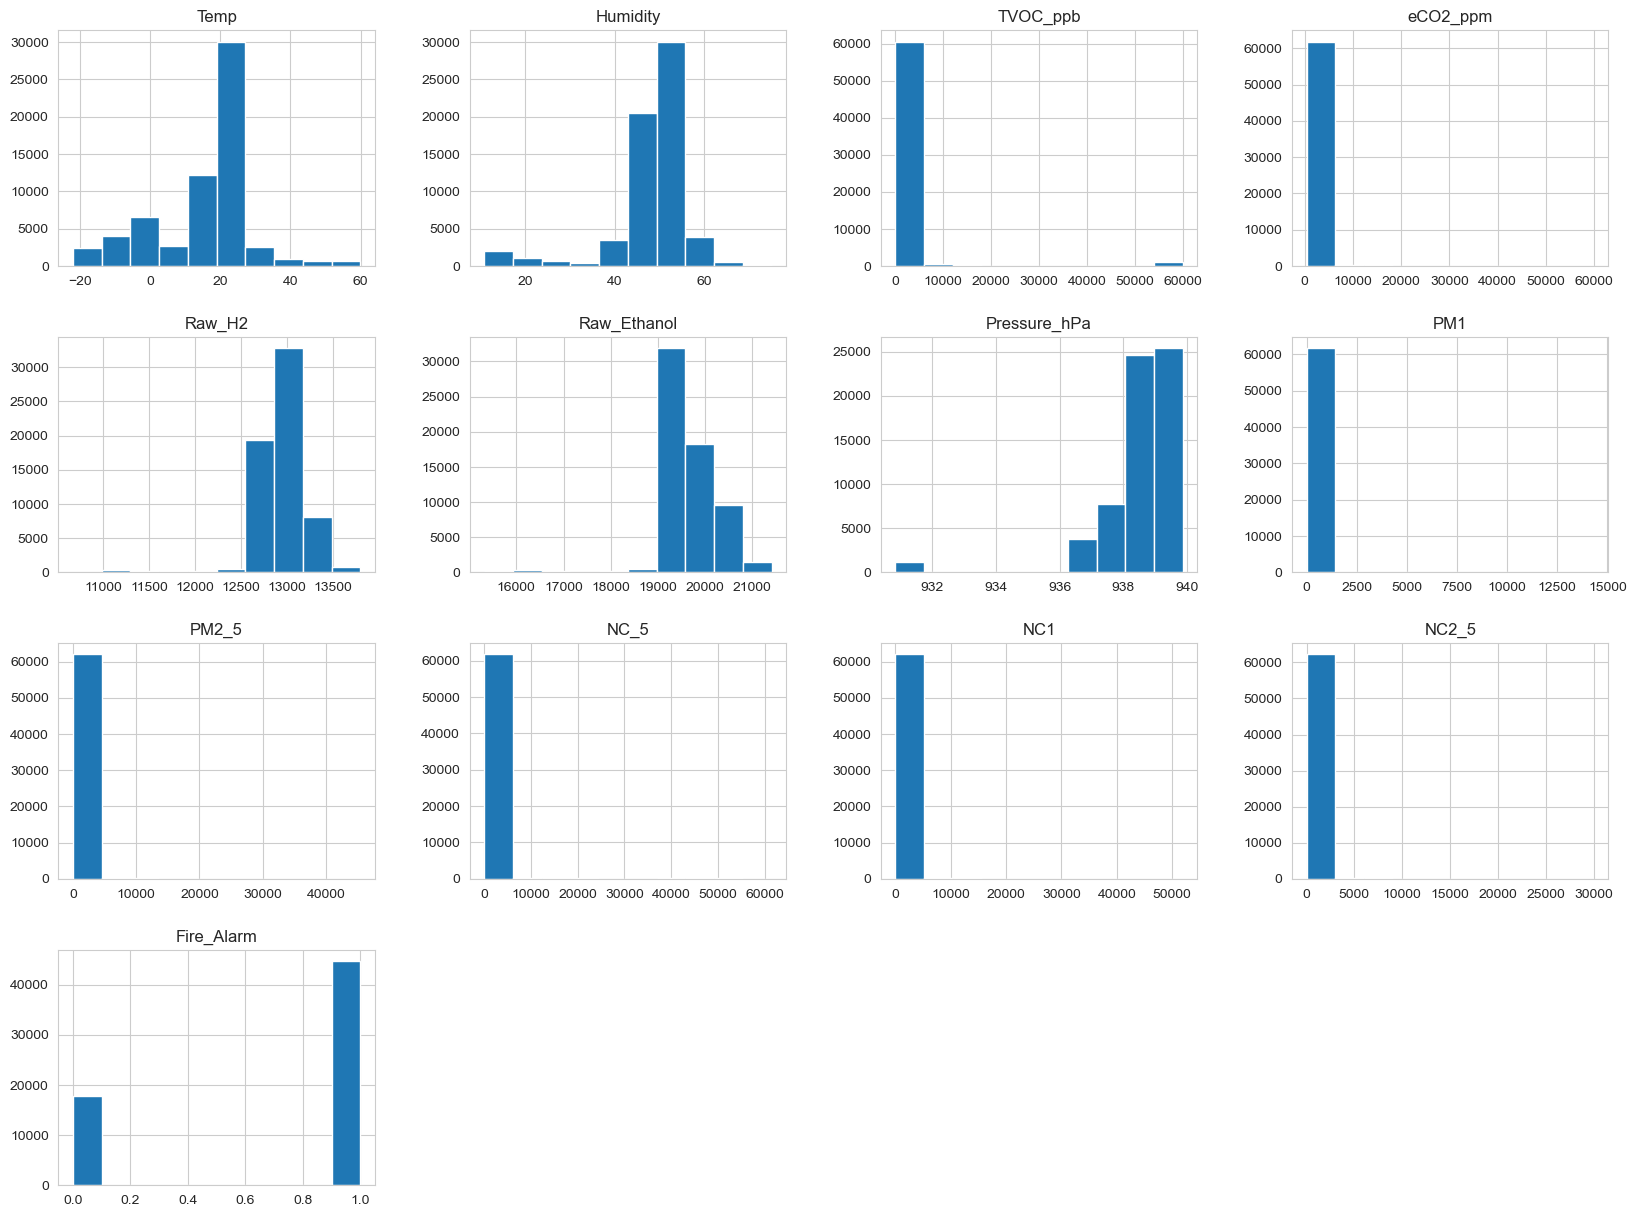

In [70]:
#visualize correlation a using seaborn pairplot

%matplotlib inline
import matplotlib.pyplot as plt
data.hist(figsize=(20,15))
plt.show()

<AxesSubplot:ylabel='Temp'>

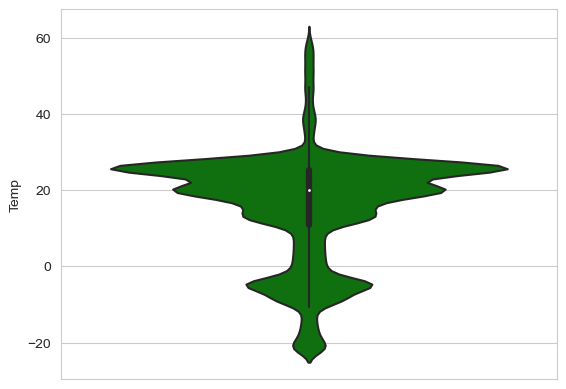

In [71]:
sns.violinplot(y=data.Temp, color ='green')


<AxesSubplot:ylabel='Humidity'>

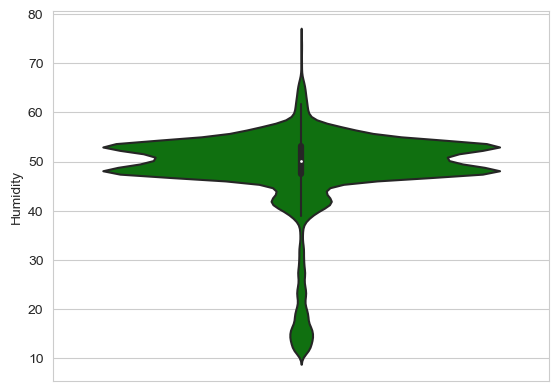

In [72]:
sns.violinplot(y=data.Humidity, color ='green')


<AxesSubplot:ylabel='TVOC_ppb'>

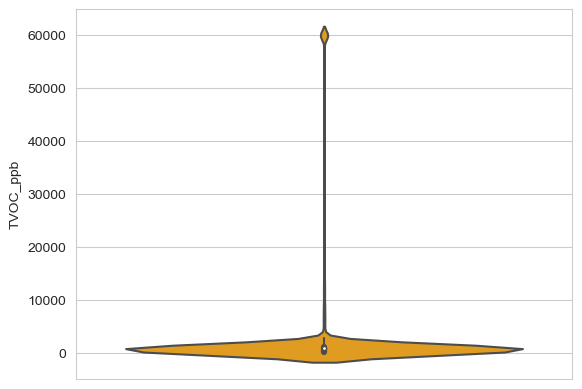

In [73]:
sns.violinplot(y=data.TVOC_ppb, color ='orange')


<AxesSubplot:ylabel='eCO2_ppm'>

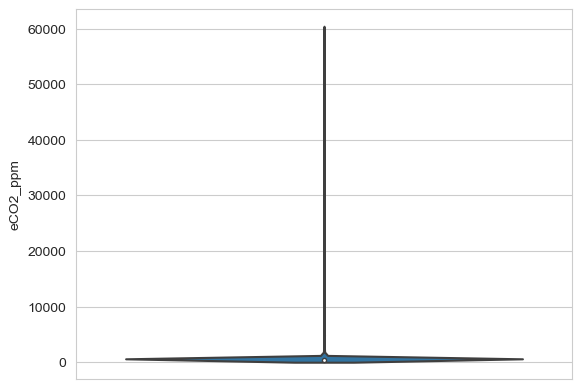

In [74]:
sns.violinplot(y=data.eCO2_ppm)


<AxesSubplot:ylabel='Raw_H2'>

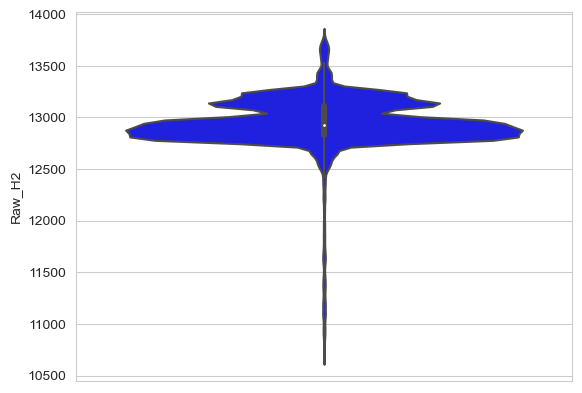

In [75]:
sns.violinplot(y=data.Raw_H2, color ='blue')


<AxesSubplot:ylabel='Raw_Ethanol'>

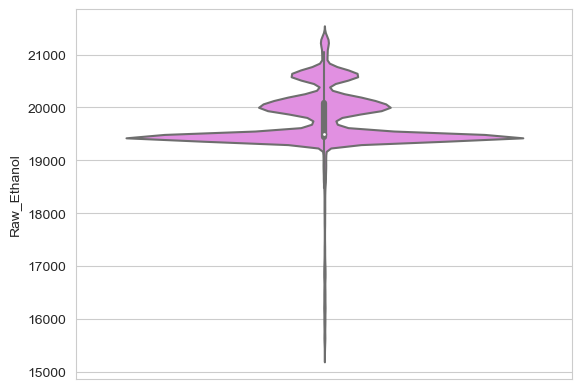

In [76]:
sns.violinplot(y=data.Raw_Ethanol, color ='violet')


<AxesSubplot:ylabel='Pressure_hPa'>

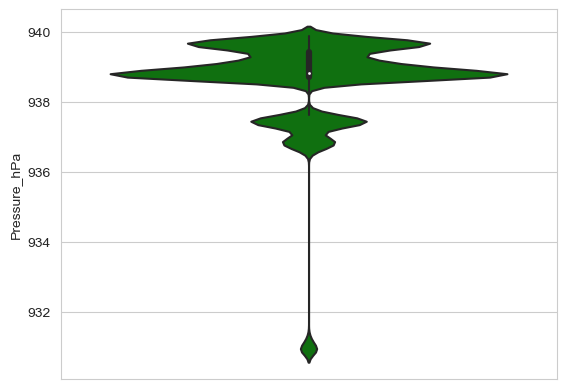

In [77]:
sns.violinplot(y=data.Pressure_hPa, color ='green')


In [78]:
F = data['Fire_Alarm'].value_counts()

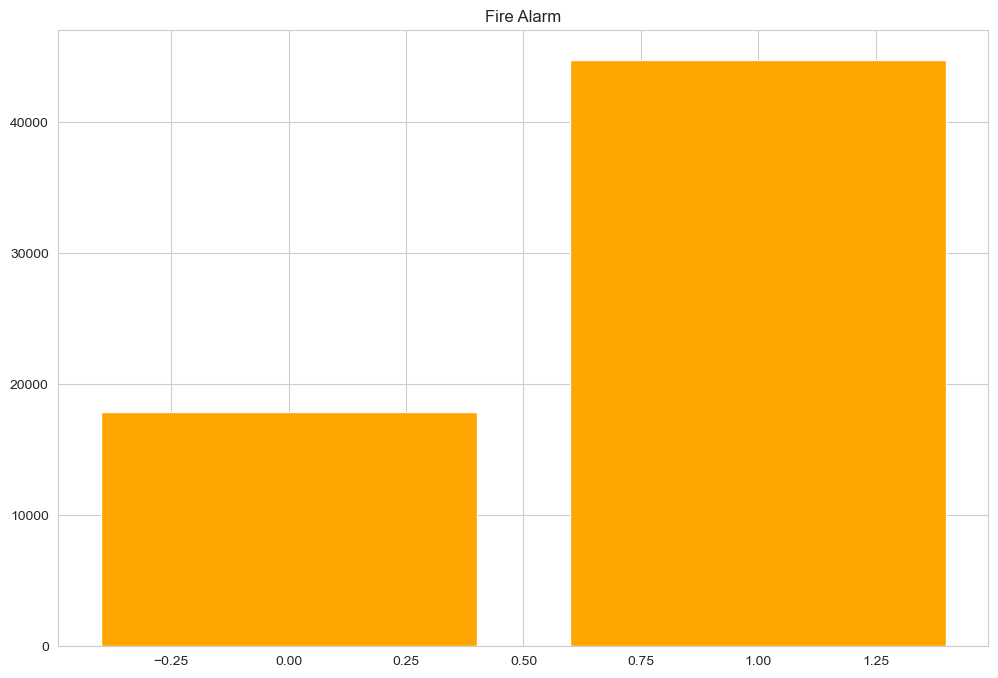

In [79]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

plt.title('Fire Alarm')
plt.bar(x=F.index, height=F, color='orange')

plt.show()

In [80]:
data['Pressure_hPa'].value_counts().sort_values(ascending=True)

930.999      1
931.186      1
931.168      1
931.251      1
931.199      1
          ... 
938.710    266
938.711    266
938.716    278
938.706    284
938.709    304
Name: Pressure_hPa, Length: 2213, dtype: int64

### Bivariate Analysis

Text(0.5, 1.0, "A plot of 'Temperature' vs 'Fire Alarm'")

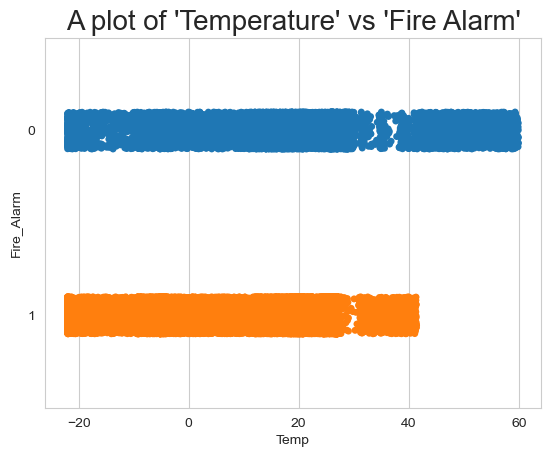

In [81]:
sns.set_style('whitegrid')
sns.stripplot(x=data.Temp, y=data.Fire_Alarm, orient = 'h')

plt.title("A plot of 'Temperature' vs 'Fire Alarm'", fontsize = 20,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'Humidity' vs 'Fire Alarm'")

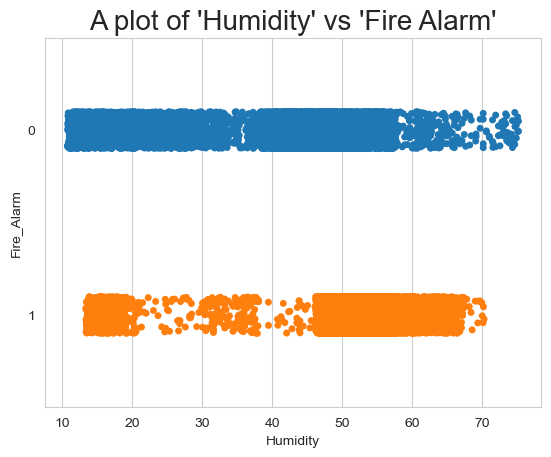

In [82]:
sns.set_style('whitegrid')
sns.stripplot(x=data.Humidity, y=data.Fire_Alarm, orient = 'h')

plt.title("A plot of 'Humidity' vs 'Fire Alarm'", fontsize = 20,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'TVOC (ppb)' vs 'Fire Alarm'")

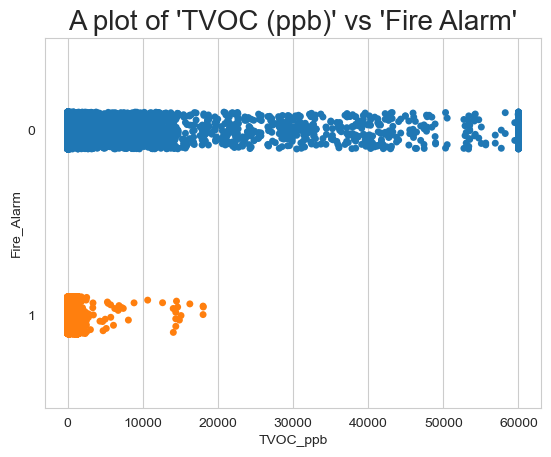

In [83]:
sns.set_style('whitegrid')
sns.stripplot(x=data.TVOC_ppb, y=data.Fire_Alarm, orient = 'h')

plt.title("A plot of 'TVOC (ppb)' vs 'Fire Alarm'", fontsize = 20,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'CO2 Concentration (ppm)' vs 'Fire Alarm'")

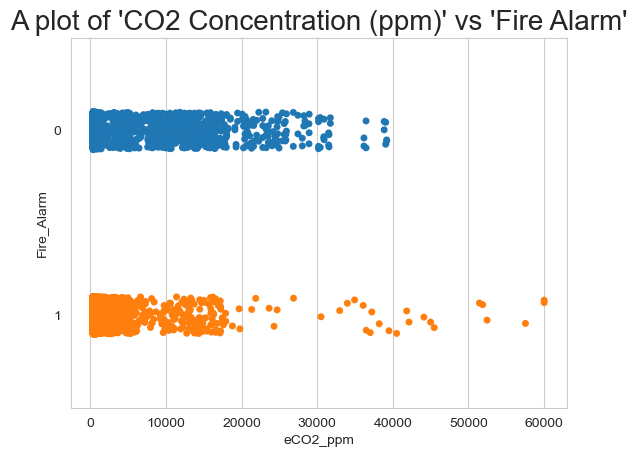

In [84]:
sns.set_style('whitegrid')
sns.stripplot(x=data.eCO2_ppm, y=data.Fire_Alarm, orient = 'h')

plt.title("A plot of 'CO2 Concentration (ppm)' vs 'Fire Alarm'", fontsize = 20,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'Raw H2' vs 'Fire Alarm'")

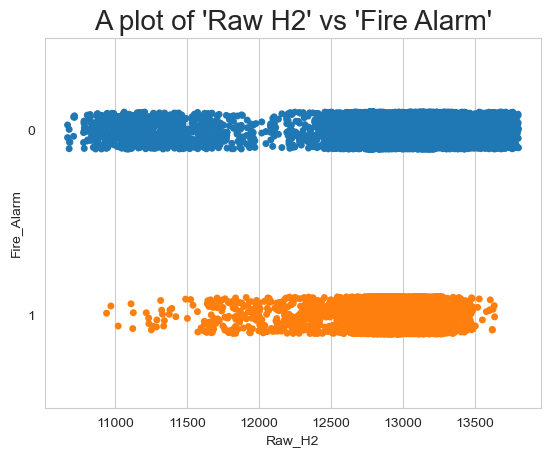

In [85]:
sns.set_style('whitegrid')
sns.stripplot(x=data.Raw_H2, y=data.Fire_Alarm, orient = 'h')

plt.title("A plot of 'Raw H2' vs 'Fire Alarm'", fontsize = 20,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'Raw Ethanol' vs 'Fire Alarm'")

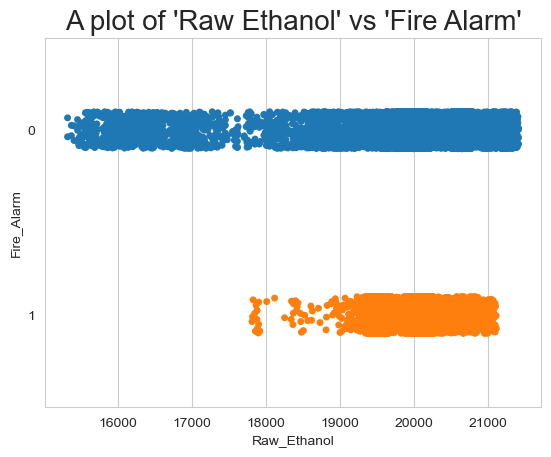

In [86]:
sns.set_style('whitegrid')
sns.stripplot(x=data.Raw_Ethanol, y=data.Fire_Alarm, orient = 'h')

plt.title("A plot of 'Raw Ethanol' vs 'Fire Alarm'", fontsize = 20,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'Air Pressure' vs 'Fire Alarm'")

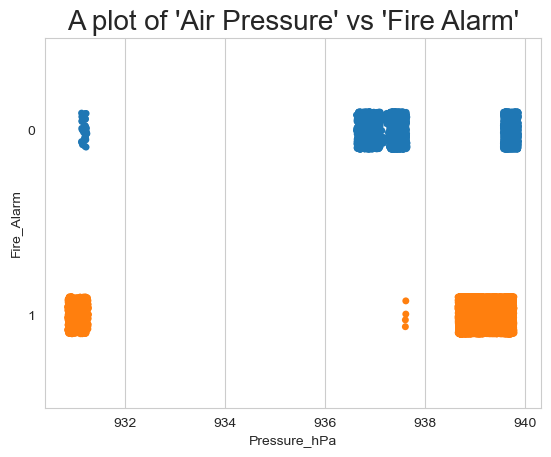

In [87]:
sns.set_style('whitegrid')
sns.stripplot(x=data.Pressure_hPa, y=data.Fire_Alarm, orient = 'h')

plt.title("A plot of 'Air Pressure' vs 'Fire Alarm'", fontsize = 20,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'PM (1.0)' vs 'Fire Alarm'")

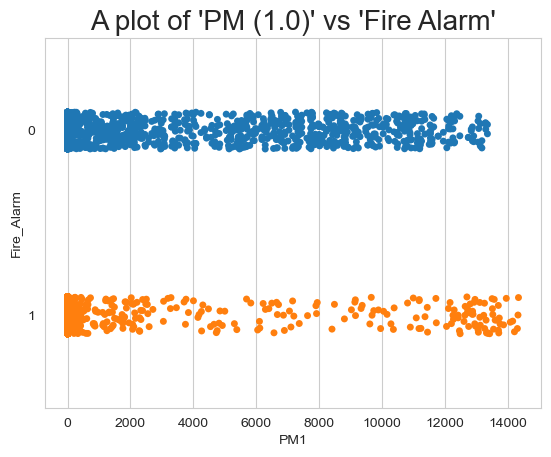

In [88]:
sns.set_style('whitegrid')
sns.stripplot(x=data.PM1, y=data.Fire_Alarm, orient = 'h')

plt.title("A plot of 'PM (1.0)' vs 'Fire Alarm'", fontsize = 20,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'PM (2.5)' vs 'Fire Alarm'")

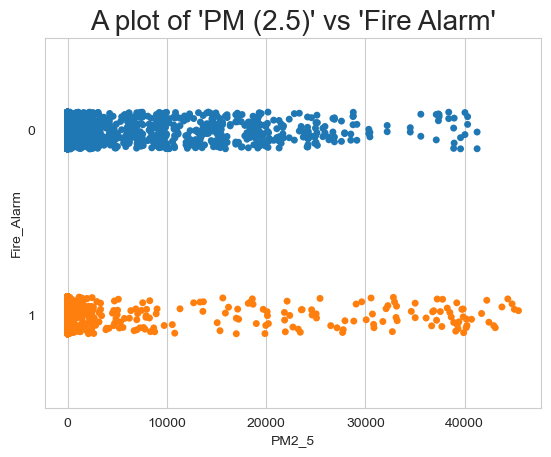

In [89]:
sns.set_style('whitegrid')
sns.stripplot(x=data.PM2_5, y=data.Fire_Alarm, orient = 'h')

plt.title("A plot of 'PM (2.5)' vs 'Fire Alarm'", fontsize = 20,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'NC (0.5)' vs 'Fire Alarm'")

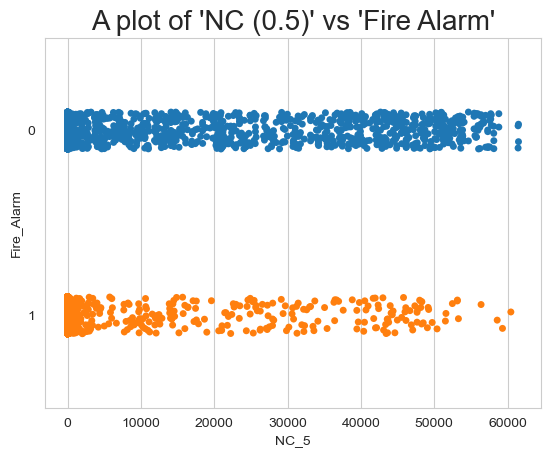

In [90]:
sns.set_style('whitegrid')
sns.stripplot(x=data.NC_5, y=data.Fire_Alarm, orient = 'h')

plt.title("A plot of 'NC (0.5)' vs 'Fire Alarm'", fontsize = 20,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'NC (1.0)' vs 'Fire Alarm'")

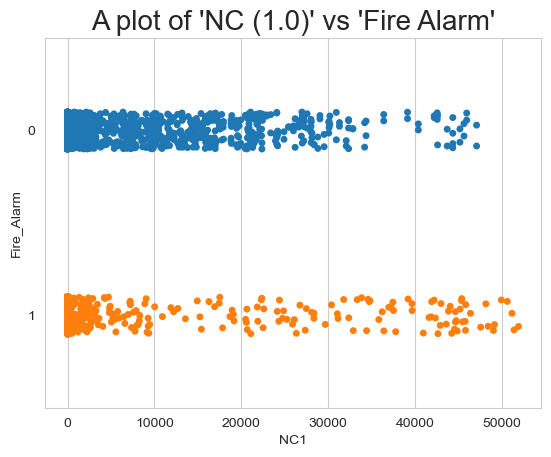

In [91]:
sns.set_style('whitegrid')
sns.stripplot(x=data.NC1, y=data.Fire_Alarm, orient = 'h')

plt.title("A plot of 'NC (1.0)' vs 'Fire Alarm'", fontsize = 20,
             loc ='center', )

Text(0.5, 1.0, "A plot of 'NC (2.5)' vs 'Fire Alarm'")

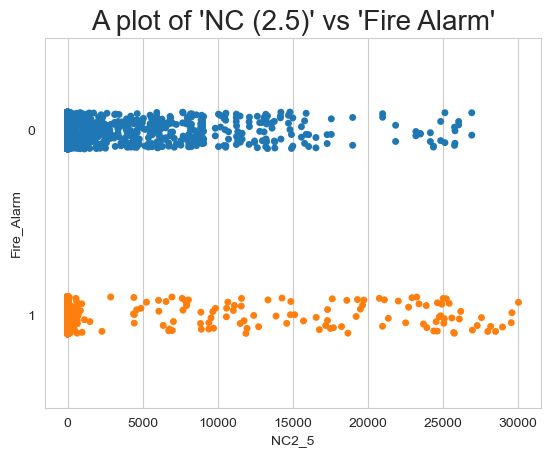

In [92]:
sns.set_style('whitegrid')
sns.stripplot(x=data.NC2_5, y=data.Fire_Alarm, orient = 'h')

plt.title("A plot of 'NC (2.5)' vs 'Fire Alarm'", fontsize = 20,
             loc ='center', )

## TRAIN TEST SPLIT

In [93]:
#import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import warnings
warnings.filterwarnings('ignore')

In [94]:
# drop Fire Alarm

X = data.drop("Fire_Alarm", axis =1)
y = data['Fire_Alarm']

X.shape, y.shape

((62630, 12), (62630,))

In [95]:
#split into training and validation sets using a 30% split ratio

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)


## MODEL BUILDING

In [151]:
#Initialize the models

LR = LogisticRegression(random_state=42)
SGD = SGDClassifier()
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)
EC = ExtraTreesClassifier(random_state=0)
SVM = svm.SVC()
AC = AdaBoostClassifier()
NB = GaussianNB()
P = Perceptron()
LA = LinearDiscriminantAnalysis()

In [152]:
#create list of your model names
models = [LR, SGD, KN, DC, RF, EC, SVM, AC, NB, P, LA]

In [153]:
#create function to train a model and evaluate accuracy
def trainer(models,X_train,y_train,X_test,y_test):
    #fit your model
    models.fit(X_train,y_train)
    #predict on the fitted model
    prediction = models.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(models.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(prediction,y_test))
    

In [154]:
#loop through each model, training in the process
for model in models:
    trainer(model,X_train,y_train,X_test,y_test)


For LogisticRegression, Accuracy score is 0.8827505455319602 

              precision    recall  f1-score   support

           0       0.62      0.95      0.75      3523
           1       0.99      0.87      0.92     15266

    accuracy                           0.88     18789
   macro avg       0.80      0.91      0.84     18789
weighted avg       0.92      0.88      0.89     18789


For SGDClassifier, Accuracy score is 0.8765767204215232 

              precision    recall  f1-score   support

           0       0.60      0.96      0.73      3353
           1       0.99      0.86      0.92     15436

    accuracy                           0.88     18789
   macro avg       0.79      0.91      0.83     18789
weighted avg       0.92      0.88      0.89     18789


For KNeighborsClassifier, Accuracy score is 0.9996274415881633 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5381
           1       1.00      1.00      1.00     

In [159]:
Model = []
Accuracy = []

for model in models:
    Model.append(type(model).__name__)
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    accuracy = accuracy_score(prediction,y_test)
    Accuracy.append(accuracy)

In [160]:
df = {'Model': Model, 'Accuracy':Accuracy}
data_df = pd.DataFrame(df)
data_df

,Model,Accuracy
0,LogisticRegression,0.882751
1,SGDClassifier,0.872585
2,KNeighborsClassifier,0.999627
3,DecisionTreeClassifier,0.999947
4,RandomForestClassifier,1.000000
5,ExtraTreesClassifier,1.000000
6,SVC,0.880249
7,AdaBoostClassifier,0.999255
8,GaussianNB,0.762521
9,Perceptron,0.862100


# 


### Model with the closest accuracy are ExtraTreesClassifier, RandonForest Classifier, DecisionTreeClassifier, KNeighborsClassifier, and AdaBoostClassifier.



In [161]:
import plotly.express as px

data_df.sort_values(by = 'Accuracy', ascending =True, inplace =True)
fig = px.line(data_df, x = data_df.Model, y = data_df.Accuracy, title = 'Accuracy vs Model', )
fig.show()

## Confusion Matrix

In [103]:
from sklearn.metrics import confusion_matrix

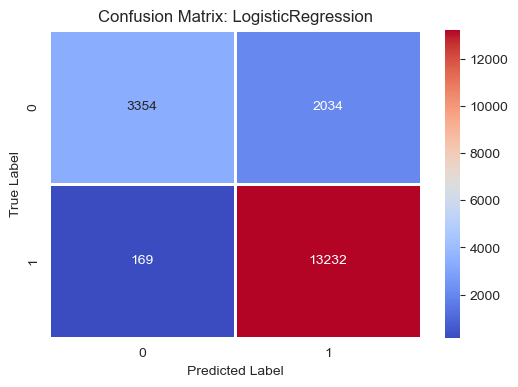

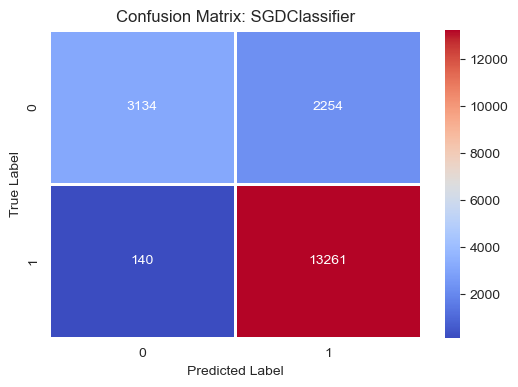

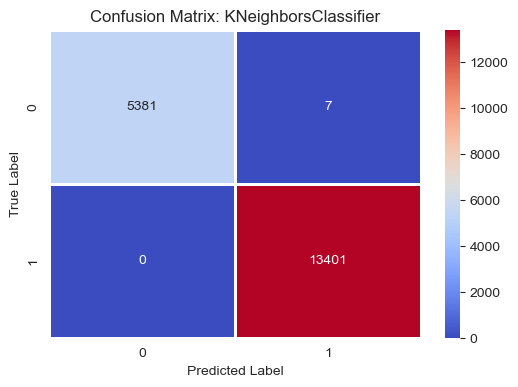

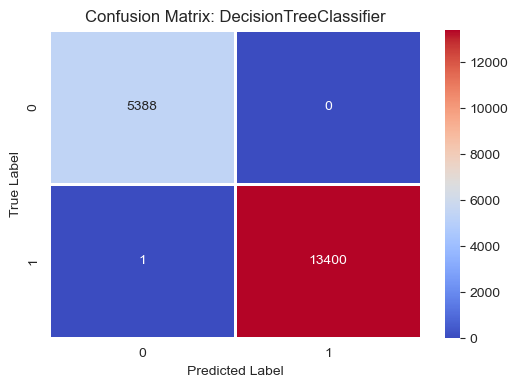

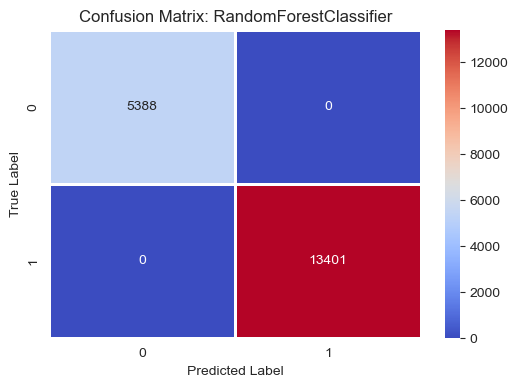

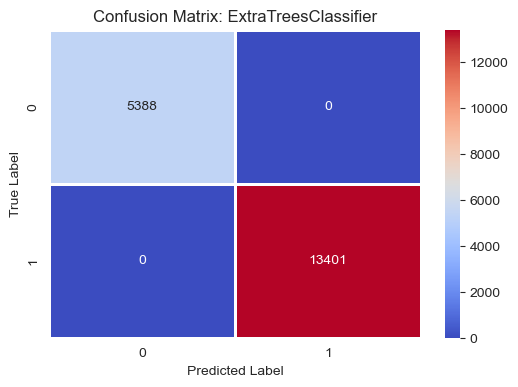

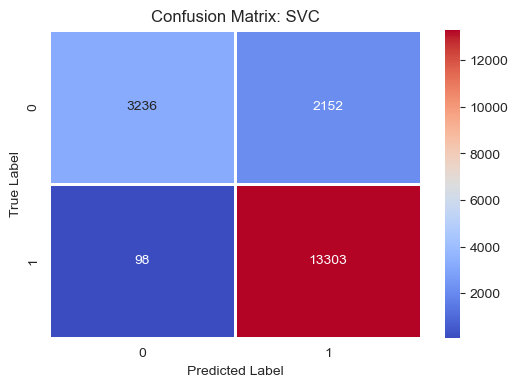

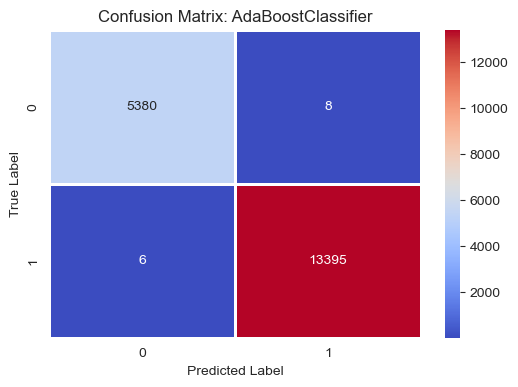

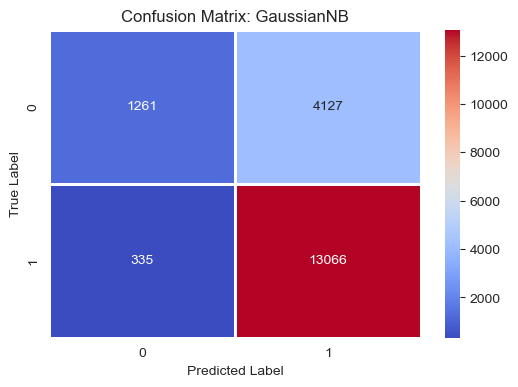

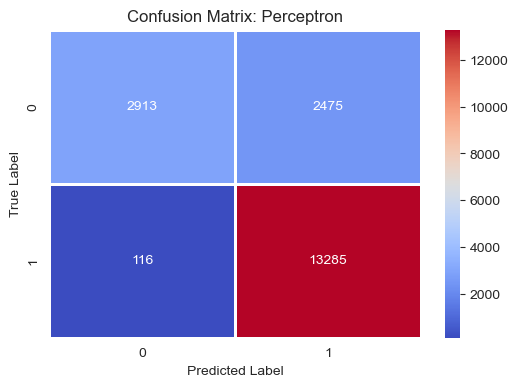

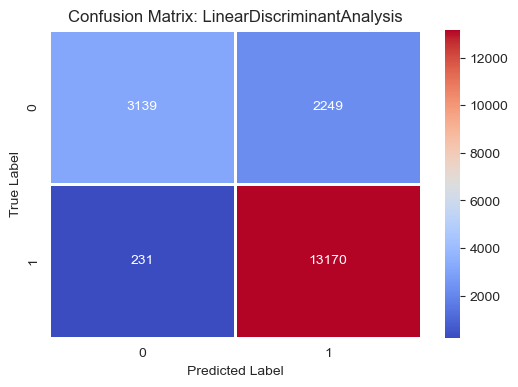

In [164]:
#loop through each model, training in the process

for model in models:
    prediction = model.predict(X_test)
    
    cm = confusion_matrix(y_test,prediction )
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm,
    cmap='coolwarm',
    linecolor='white',
    linewidths=1,
    annot=True,
    fmt='d')
        
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.title('Confusion Matrix: {}'.format(model.__class__.__name__))
    
    plt.show()